<a href="https://colab.research.google.com/github/rpasquini/urban-econometrics/blob/master/OLS_2_Ajuste_Propiedades_Test_de_Hip%C3%B3tesis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install geopandas

     |████████████████████████████████| 931kB 2.5MB/s 
     |████████████████████████████████| 14.7MB 307kB/s 
     |████████████████████████████████| 10.9MB 43.8MB/s 


In [2]:
import geopandas as gpd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
departamentos=gpd.GeoDataFrame.from_file("https://github.com/rpasquini/urban-econometrics/blob/master/data/departamentos2019amba.zip?raw=true")

In [4]:
datos=departamentos[['price', 'bedrooms']]

In [5]:
# el metodo dropna() me permite eliminar las filas que tienen algun valor missing
datos=datos.dropna()

In [6]:
Y=datos.price
X=datos.bedrooms
X=sm.add_constant(X)

In [8]:
modelo=sm.OLS(Y,X)
resultados=modelo.fit()

In [ ]:
# mostramos los resultados
print(resultados.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.049
Model:                            OLS   Adj. R-squared:                  0.049
Method:                 Least Squares   F-statistic:                     1443.
Date:                Thu, 18 Jun 2020   Prob (F-statistic):          7.68e-308
Time:                        14:29:22   Log-Likelihood:            -3.0876e+05
No. Observations:               27879   AIC:                         6.175e+05
Df Residuals:                   27877   BIC:                         6.175e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.151e+04    205.145     56.088      0.0

# Predicción

$\hat{Y}=\hat{\beta_0}+\hat{\beta_1}*X$

In [13]:
# Departamento de 2 dormitorios
11510+4253*2

20016

In [14]:
# Departamento de 2 dormitorios
resultados.params['const']+resultados.params['bedrooms']*2

20013.204472922604

In [15]:
# Predicciones para observaciones en la data
resultados.params['const']+resultados.params['bedrooms']*datos.bedrooms

0        15759.697728
2        20013.204473
4        15759.697728
43       15759.697728
45       15759.697728
             ...     
50647    20013.204473
50648    15759.697728
50650    28520.217963
50651    15759.697728
50652    20013.204473
Name: bedrooms, Length: 27879, dtype: float64

In [16]:
resultados.predict(X)

0        15759.697728
2        20013.204473
4        15759.697728
43       15759.697728
45       15759.697728
             ...     
50647    20013.204473
50648    15759.697728
50650    28520.217963
50651    15759.697728
50652    20013.204473
Length: 27879, dtype: float64

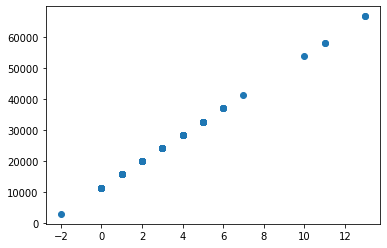

In [17]:
# Ploteamos prediccion con matplolib
plt.scatter(datos.bedrooms, resultados.predict(X))

# Error Cuadrático Medio


In [ ]:
resultados.mse_resid

243930120.92914465

Error Cuadrático Medio (MSE) a mano

$MSE=\sqrt{\frac{\sum^n_{i=1} e_i^2}{n-2}}$ donde

$e=y-\hat{y}$



In [23]:
ypred = resultados.predict(X)
residuos=Y-ypred
rss=np.sum(residuos**2)
MSE=(rss/(resultados.nobs-2))
MSE

243930120.92914465

In [24]:
MSE**0.5

15618.262417091879

In [ ]:
residuos2=residuos*residuos
residuos2.describe()

count    2.787900e+04
mean     2.439126e+08
std      3.686013e+09
min      3.832827e+01
25%      5.106234e+06
50%      2.513222e+07
75%      1.436833e+08
max      4.126768e+11
dtype: float64

In [ ]:
residuos.describe()

count    2.787900e+04
mean     5.759983e-11
std      1.561798e+04
min     -5.769477e+04
25%     -6.013204e+03
50%     -1.759698e+03
75%      3.986796e+03
max      6.423993e+05
dtype: float64

# Propiedades de los estimadores cuando los errores son normales

¿Cuál es el beta que espero obtener si los errores de nuestro fueran errores normales?
Simulamos las estimaciones de los coeficientes beta en presencia de errores normales  



(array([2.400e+01, 2.490e+02, 1.612e+03, 5.015e+03, 8.723e+03, 7.642e+03,
        3.622e+03, 8.680e+02, 1.160e+02, 8.000e+00]),
 array([-62491.59528379, -49543.05007022, -36594.50485665, -23645.95964308,
        -10697.41442951,   2251.13078406,  15199.67599763,  28148.2212112 ,
         41096.76642477,  54045.31163834,  66993.85685191]),
 <a list of 10 Patch objects>)

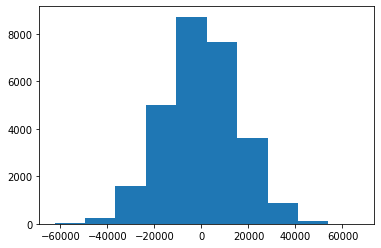

In [ ]:

e_simu= np.random.normal(0, 15617, 27879)
plt.hist(e_simu)


In [ ]:
def simu():
  e_simu = np.random.normal(0, 15617, 27879)
  y_simu=1.151e+04+4253.5067*datos.bedrooms+e_simu
  model_simu=sm.OLS(y_simu,X)
  resultados_simu=model_simu.fit()
  #print(resultados_simu.summary())
  #print(resultados_simu.params['bedrooms'])
  return resultados_simu.params['bedrooms']
simu()

4136.3514932957105

In [ ]:
betacoefs=[]
for i in range(0,200):
  beta=simu()
  betacoefs.append(beta)
print(betacoefs)


[4143.386073022606, 4071.22527025976, 4195.925662762462, 4196.431313673331, 4097.137536612655, 4189.404663726467, 4499.606641935565, 4286.665073675551, 4328.7059279116, 4193.329419498614, 4320.407243421195, 4245.08168462754, 4313.574511045935, 4088.602873979174, 4223.795231268065, 4198.29242980668, 4210.6765294119905, 4252.850836789494, 4279.684222190424, 4165.439087324192, 4312.12174518929, 4265.586166996356, 4165.152903783814, 4246.5528922743615, 4297.252464449558, 4227.929353909369, 4313.1793684475615, 4303.699114018703, 4263.687689153709, 4287.511452661091, 4255.6013996226175, 4168.499008041259, 4338.731553354319, 4299.153215088924, 4203.676315841913, 4088.0119412945237, 4146.553098350327, 4236.866806081003, 4225.971484569218, 4195.867091287391, 4441.213271533007, 4326.201939215861, 4184.303930067296, 4111.795158572679, 4094.9184622480298, 4289.056378957178, 4307.2685383123835, 4379.845101824143, 4075.162224522618, 4162.528748423024, 4215.883562725155, 3933.6548529503425, 4302.1117

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f87f5100048>]],
      dtype=object)

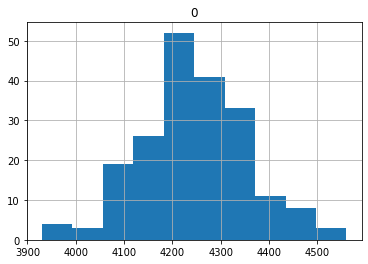

In [ ]:
import pandas as pd
pd.DataFrame(betacoefs).hist()

(array([ 4.,  3., 19., 26., 52., 41., 33., 11.,  8.,  3.]),
 array([3930.36537949, 3993.32009244, 4056.27480539, 4119.22951834,
        4182.18423129, 4245.13894423, 4308.09365718, 4371.04837013,
        4434.00308308, 4496.95779603, 4559.91250898]),
 <a list of 10 Patch objects>)

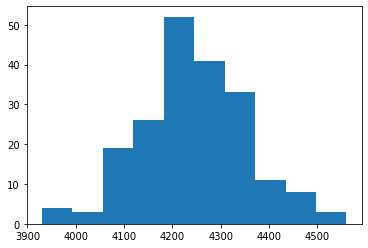

In [ ]:
import matplotlib.pyplot as plt
plt.hist(betacoefs)

# Cómo son los residuos (errores estimados) en mis datos?


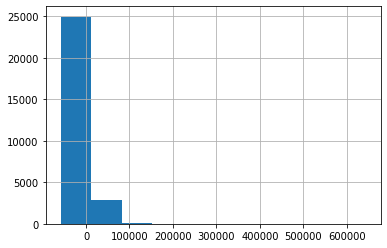

In [ ]:
residuos.hist()